# TRAN Simulation Example

In this example, we run a **Tran**ient simulation of an ideal buck (step-down) model.

This is the same code saved in the **30_TRAN.py**, with more interactive descriptions.

## 1. Run a Simulation

After running below block of code, we have the simulation result in a Pandas DataFrame **df**.

In [1]:
from PyQSPICE import clsQSPICE as pqs

import re
import math
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

fname = "Buck_COT_TRAN"

run = pqs(fname)

run.InitPlot()

run.qsch2cir()
run.cir2qraw()

run.setNline(4999)

df = run.LoadQRAW(["V(OUT)", "V(SS)", "V(Ics)", "V(COMP)"])

print(df)

              Time        V(OUT)         V(SS)    V(Ics)   V(COMP)  Step
0     0.000000e+00  0.000000e+00 -3.062458e-08  2.000000  0.000000     0
1     2.000400e-07  4.420626e-12 -3.062458e-08  2.000000  0.001052     0
2     4.000800e-07  8.841253e-12 -3.062458e-08  2.000000  0.002104     0
3     6.001200e-07  1.326188e-11 -3.062458e-08  2.000000  0.003157     0
4     8.001600e-07  1.768251e-11 -3.062458e-08  2.000000  0.004209     0
...            ...           ...           ...       ...       ...   ...
4995  9.991998e-04  3.304989e+00  1.001414e+00  2.378284  2.284755     0
4996  9.993999e-04  3.304942e+00  1.001414e+00  2.288535  2.285017     0
4997  9.995999e-04  3.304878e+00  1.001414e+00  2.352343  2.285395     0
4998  9.998000e-04  3.305085e+00  1.001414e+00  2.310371  2.284120     0
4999  1.000000e-03  3.304809e+00  1.001414e+00  2.326394  2.285774     0

[5000 rows x 6 columns]


## 2. Plotting

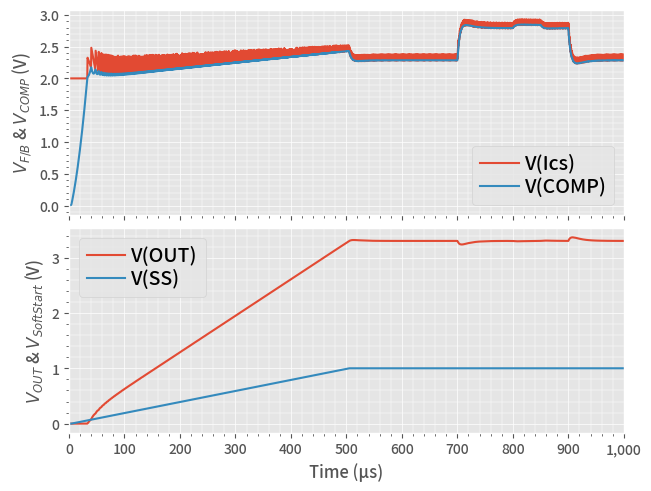

In [2]:
# Prepare a blank plotting area
fig2, (axT, axB) = plt.subplots(2,1,sharex=True,constrained_layout=True)

# Plot TRAN waveforms
df.plot(ax=axB, x="Time",  y="V(OUT)", label="V(OUT)")
df.plot(ax=axB, x="Time",  y="V(SS)", label="V(SS)")
df.plot(ax=axT, x="Time",  y="V(Ics)", label="V(Ics)")
df.plot(ax=axT, x="Time",  y="V(COMP)", label="V(COMP)")

run.PrepTimePlot(axT, "Time", r"$V_{F/B}$ & $V_{COMP}$ (V)", [0,1e-3], "auto")
run.PrepTimePlot(axB, "Time", r"$V_{OUT}$ & $V_{SoftStart}$ (V)", [0,1e-3], "auto")

# Save the PLot in PNG file
plt.savefig(fname + "_plt.png", format='png', bbox_inches='tight')
plt.show()

plt.close('all')